In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error


In [2]:
# import 10 fold validation with 160 predictors

regression160 = pd.read_pickle('velocityRegression160.pkl')
regressionScores160 = pd.read_pickle('velocityRegressionScores160.pkl')

In [3]:
# import 10 fold validation with 8 transcription factors

regression8 = pd.read_pickle('velocityRegression8.pkl')
regressionScores8 = pd.read_pickle('velocityRegressionScores8.pkl')

In [4]:
regressionScores8

,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,target
0,LinearRegression(),0.234602,0.244825,-0.826827,-0.748290,Erdr1
1,LinearRegression(),0.236874,0.244648,-0.809861,-0.750129,Erdr1
2,LinearRegression(),0.230081,0.245384,-0.771137,-0.754420,Erdr1
3,LinearRegression(),0.248494,0.243280,-0.716695,-0.760512,Erdr1
4,LinearRegression(),0.240260,0.244171,-0.761555,-0.755545,Erdr1
...,...,...,...,...,...,...
5,LinearRegression(),0.045619,0.086222,-0.957000,-0.913420,Mrpl15
6,LinearRegression(),0.098908,0.080282,-0.902412,-0.919446,Mrpl15
7,LinearRegression(),0.073370,0.083225,-0.965496,-0.912426,Mrpl15
8,LinearRegression(),0.089865,0.081318,-0.902666,-0.919435,Mrpl15


In [21]:
# create pivot tables with predictors and target coefficients

mean_coefficients8 = regression8.pivot_table(index="predictors", columns="target", values="coeffecients", aggfunc = np.mean)
std_coefficients8 = regression8.pivot_table(index="predictors", columns="target", values="coeffecients", aggfunc = np.std)

mean_coefficients160 = regression160.pivot_table(index="predictors", columns="target", values="coeffecients", aggfunc = np.mean)
std_coefficients160 = regression160.pivot_table(index="predictors", columns="target", values="coeffecients", aggfunc = np.std)

I started off looking at the data using 8 predictors. The following shows the clustermap of the mean coefficients accross the data from the 10 fold cross validation. 

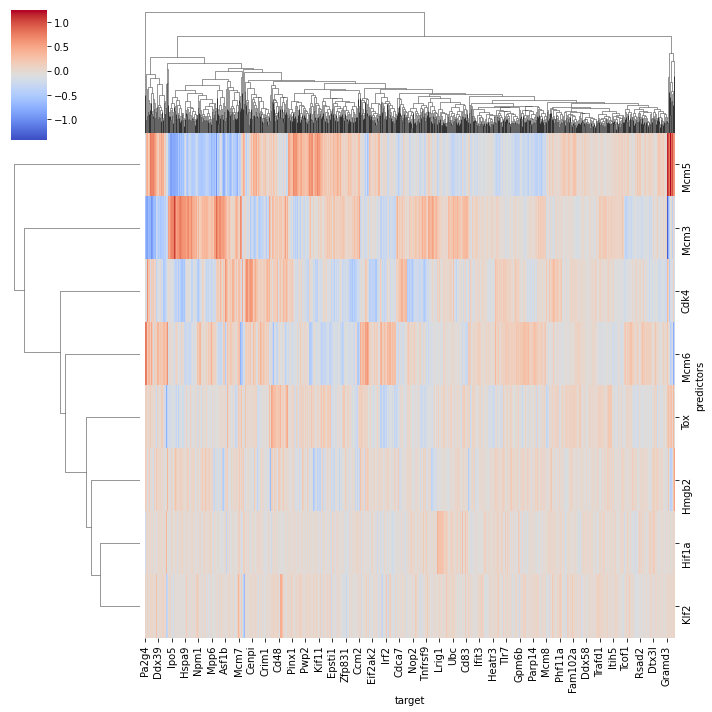

In [39]:
sns.clustermap(mean_coefficients8, cmap='coolwarm')

There are some patterns, so the model is not just random. The branch all the way to the right seems to be positively correlated by Mcm5 and negatively correlated by Mcm6. Also noteworthy is the dark area of inner branch in the top right. 

IDEA: Look at specific branches, take velocity genes and cluster map these, to get a closer look at whats going on. 

The standard deviations show, that tfs with low standard deviation also have a mean close to 0. There are some genes that have relatively high standard deviations in their Mcm5 and Mcm3 predictors.

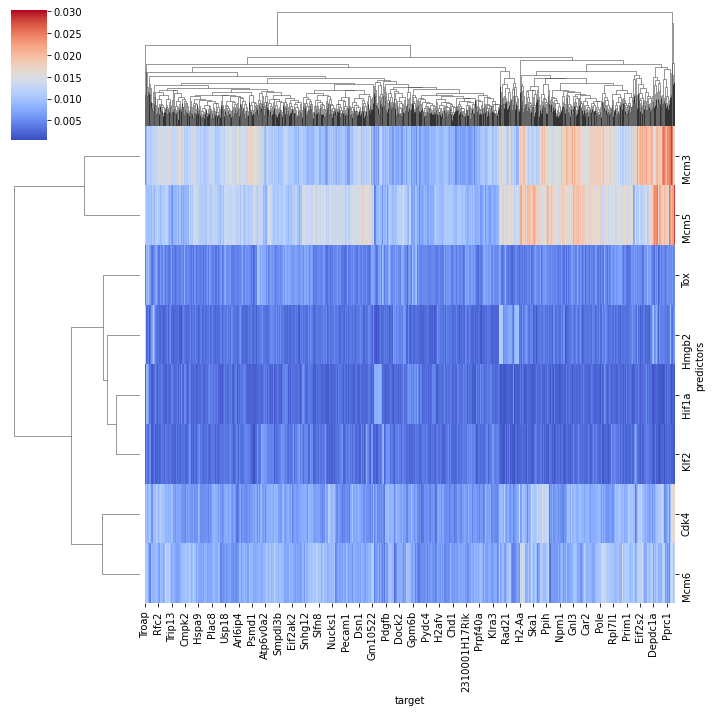

In [40]:
sns.clustermap(std_coefficients8, cmap='coolwarm')

The standard deviations show, that tfs with low standard deviation also have a mean close to 0. There are some genes that have relatively high standard deviations in their Mcm5 and Mcm3 predictors.

Looking at the clustermap of all 160 predictive genes and 10 fold cross validation, it is very hard to see patterns. I believe that the predictive genes at the top show a little bit more structure but it is difficult to make any conclusions. 

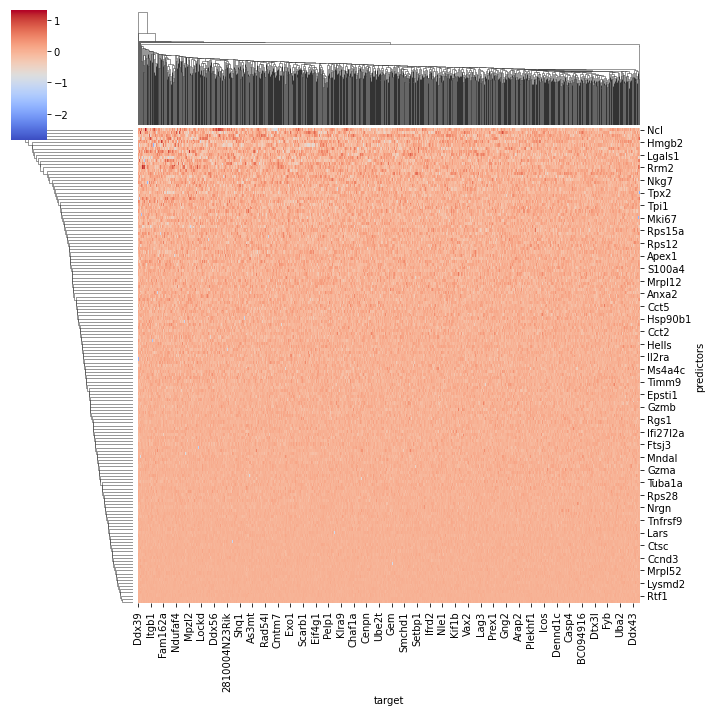

In [41]:
sns.clustermap(mean_coefficients160, cmap='coolwarm')

I am not sure what to make of the standard deviations. The values are incredibly high in total ? 

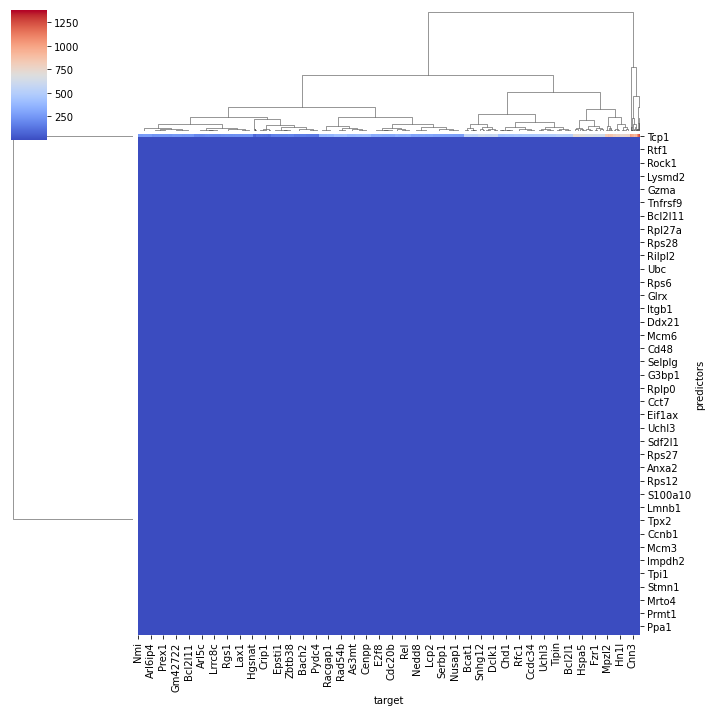

In [42]:
sns.clustermap(std_coefficients160, cmap='coolwarm')

In the following I will look at L1 regularized linear regression.